In [1]:
import pandas, numpy, qnorm

In [56]:
import scipy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.6, 9 * 0.6)})

In [3]:
input_dir = '/Users/adrian/research/vigur/data/metabolomics/targeted/'

basic_input_file = 'EC008_ROSA_PMVEC_INTRA_BASIC.xlsx'
positive_input_file = 'EC008_ROSA_PMVEC_INTRA_POS.xlsx'
negative_input_file = 'EC008_ROSA_PMVEC_INTRA_NEG.xlsx'

input_files = [positive_input_file, negative_input_file, basic_input_file]
ion_modes = ['positive', 'negative', 'basic']

In [23]:
path = input_dir + basic_input_file
metadata = pandas.read_excel(input_dir+positive_input_file, sheet_name=0, index_col=1)

new_labels = [element.split('_')[0] for element in metadata.index.values]
rosetta = dict(zip(metadata.index.values, new_labels))
metadata.rename(index=rosetta, inplace=True)
metadata.head()

['Pool1', 'Pool1', 'Pool1', 'Pool2', '008-02', '008-10', '008-22', '008-01', '008-07', '008-18', 'Pool2', '008-04', '008-23', '008-11', '008-25', '008-06', '008-27', 'Pool2', '008-17', '008-12', '008-24', '008-08', '008-14', 'Pool2', '008-20', '008-16', '008-28', '008-09', '008-21', '008-15', 'Pool2', '008-03', '008-19', '008-26', '008-13', '008-05', 'Pool2', 'Pool1', 'Pool1', 'Pool1', 'Pool2', 'A313', '008-41', 'A332', '008-36', '008-29', '008-42', 'Pool2', '008-32', '008-37', 'A330', '008-35', 'A368', 'A314', 'Pool2', '008-44', 'A350', '008-34', '008-39', 'A349', '008-31', 'Pool2', '008-43', 'A374', '008-45', 'A331', '008-30', 'Pool2', '008-38', 'A312', 'A348', '008-33', '008-40', 'Pool2']


,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1,PMUEC_INTRA_EC008_103,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
Pool1,PMUEC_INTRA_EC008_104,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
Pool1,PMUEC_INTRA_EC008_105,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
Pool2,PMUEC_INTRA_EC008_107,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
008-02,PMUEC_INTRA_EC008_109,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1


In [5]:
input_file = input_files[0]
ion_mode = ion_modes[0]
    
path = input_dir + input_file
df = pandas.read_excel(path, sheet_name=1, index_col=0)

only_008 = [element for element in df.index if '008' in element]
subset = df.loc[only_008, :]

log2intensity = numpy.log2(subset+1)

In [24]:
new_labels = [element.split('_')[0] for element in log2intensity.index.values]
print(new_labels)
rosetta = dict(zip(log2intensity.index.values, new_labels))
log2intensity.rename(index=rosetta, inplace=True)
log2intensity.head()

['008-02', '008-10', '008-22', '008-01', '008-07', '008-18', '008-04', '008-23', '008-11', '008-25', '008-06', '008-27', '008-17', '008-12', '008-24', '008-08', '008-14', '008-20', '008-16', '008-28', '008-09', '008-21', '008-15', '008-03', '008-19', '008-26', '008-13', '008-05', '008-41', '008-36', '008-29', '008-42', '008-32', '008-37', '008-35', '008-44', '008-34', '008-39', '008-31', '008-43', '008-45', '008-30', '008-38', '008-33', '008-40']


,Phenylalanine IS,Glucose IS,Carnitine IS,Carnitine IS.1,Glutamic Acid IS,AMP IS,Lysine IS,19:0 LPC IS,Alanine IS,ADMA,...,Fragment Degradation Glutathione,Glutathione reduced,Riboflavin,Lactoylglutathione,Glycogen,Cysteine Glutathione disulfide,Cysteineglycine disulfide.1,pipecolic acid,nAcSpermidine,AMP
Sample,,,,,,,,,,,,,,,,,,,,,
008-02,8.580899,10.117929,10.784735,10.896776,4.511531,12.749024,7.969692,5.441616,5.181778,1.935837,...,4.920484,6.228819,9.953254,3.719950,0.368489,0.649845,1.068327,6.409527,3.209765,5.260590
008-10,9.128283,10.503223,11.774126,11.762594,5.498091,13.212220,8.232824,3.907179,5.632675,2.983860,...,5.230510,7.649105,10.296231,4.413188,0.725959,2.807561,2.231432,6.798310,3.938944,4.576522
008-22,9.081696,10.388577,11.962304,11.967141,4.218471,13.354555,8.296512,4.591799,5.443043,3.624920,...,4.849048,4.322217,10.106495,2.892002,0.531069,2.698885,2.918959,6.438659,2.562426,5.099337
008-01,8.738960,10.138372,11.751703,11.778757,4.708408,12.416898,7.893138,4.233658,5.174606,3.596577,...,5.437028,6.385655,8.729828,3.648120,0.113700,2.076217,2.094912,6.910301,3.478713,4.882594
008-07,8.689131,10.244428,11.093066,11.241156,4.228742,13.074059,8.171837,4.410884,5.278431,4.183963,...,4.880245,6.260628,10.009256,3.520674,0.055196,2.705093,2.414947,7.163287,4.044132,5.757637


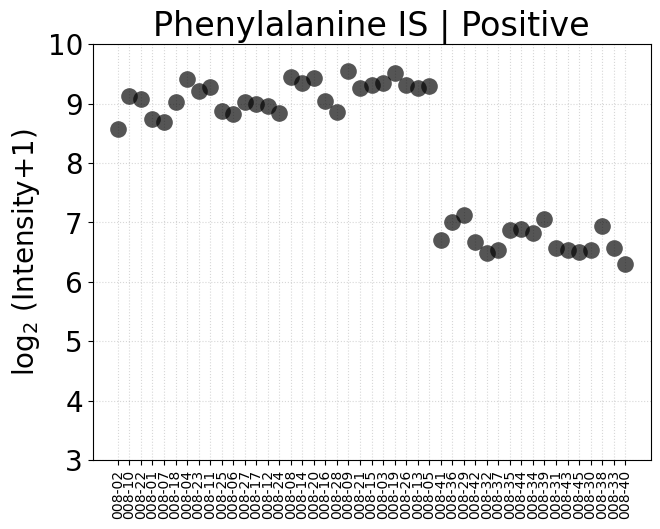

In [7]:
metabolite = 'Phenylalanine IS'
internal_standard = log2intensity[metabolite]

matplotlib.pyplot.plot(log2intensity[metabolite], 'o', color='black', ms=12, alpha=2/3, mew=0)

matplotlib.pyplot.ylim(3, 10)
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title(metabolite + ' | Positive')
matplotlib.pyplot.show()

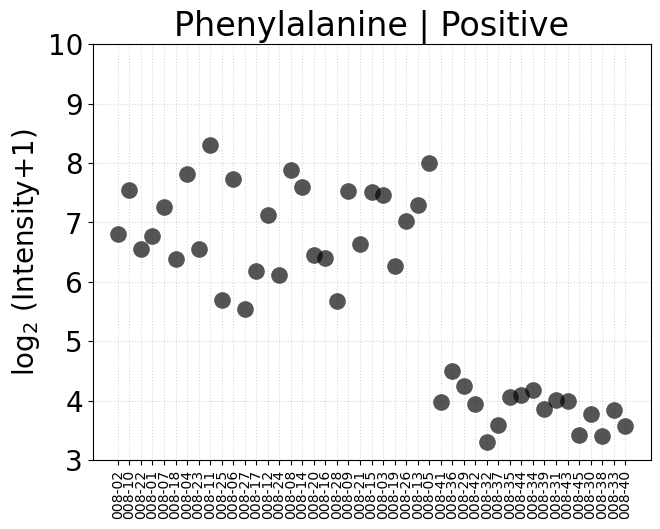

In [8]:
metabolite = 'Phenylalanine'
phenylalanine = log2intensity[metabolite]

matplotlib.pyplot.plot(log2intensity[metabolite], 'o', color='black', ms=12, alpha=2/3, mew=0)

matplotlib.pyplot.ylim(3, 10)
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title(metabolite + ' | Positive')
matplotlib.pyplot.show()

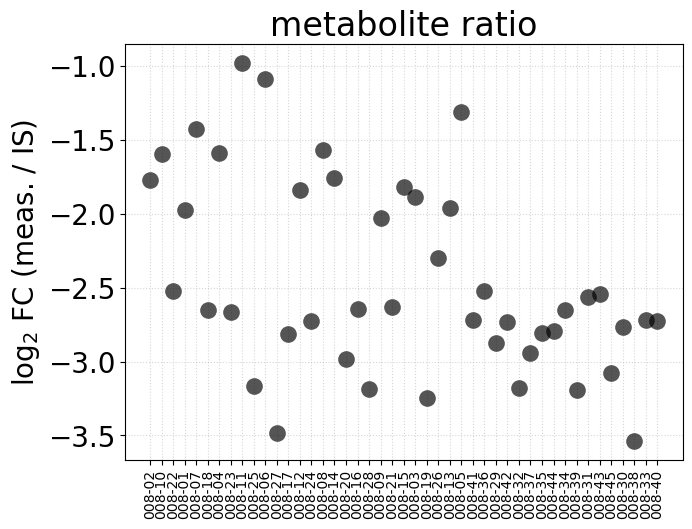

In [9]:
metabolite_ratio = phenylalanine - internal_standard

matplotlib.pyplot.plot(metabolite_ratio, 'o', color='black', ms=12, alpha=2/3, mew=0)

matplotlib.pyplot.ylabel('log$_2$ FC (meas. / IS)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('metabolite ratio')
matplotlib.pyplot.show()

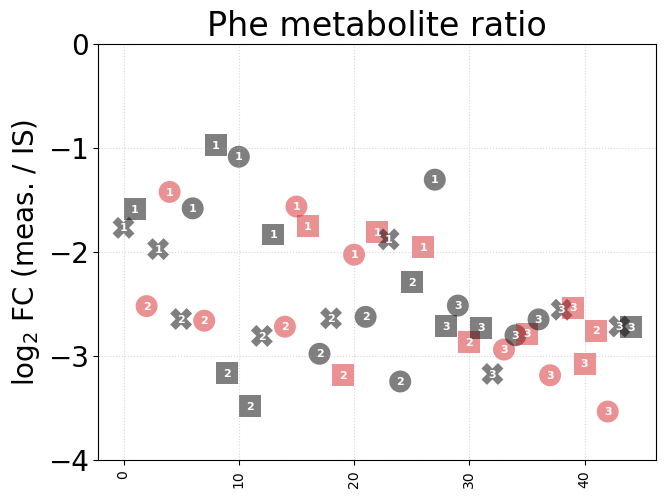

In [10]:
x = range(1, len(metabolite_ratio)+1); y = metabolite_ratio.values

for i in range(len(metabolite_ratio.index)):
    
    label = metabolite_ratio.index[i]
    
    #
    # treatment
    #
    treatment = metadata.loc[label, 'µM catech']
        
    if treatment == 0:
        the_color = 'black'
    elif treatment == 5:
        the_color = 'tab:red'
    else:
        print(treatment)
        raise ValueError('unknown treatment')

    #
    # timepoint
    #
    timepoint = metadata.loc[label, 'Timepoint']
    if timepoint == 0:
        the_marker = 'X'
    elif timepoint == 4:
        the_marker = 'o'
    elif timepoint == 24:
        the_marker = 's'
    else:
        raise ValueError('unknown timepoint')

    #
    # replicate
    #
    replicate = metadata.loc[label, 'BioReplicate']

    #
    # plot
    #
    matplotlib.pyplot.scatter(i, metabolite_ratio.values[i], s=250, c=the_color, alpha=1/2, edgecolors='none', marker=the_marker)
    matplotlib.pyplot.text(i, metabolite_ratio.values[i], replicate, fontsize=8, color='white', ha='center', va='center', weight='bold')

#
# close figure
#
matplotlib.pyplot.ylim(-4, 0)
matplotlib.pyplot.ylabel('log$_2$ FC (meas. / IS)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('Phe metabolite ratio')
matplotlib.pyplot.show()

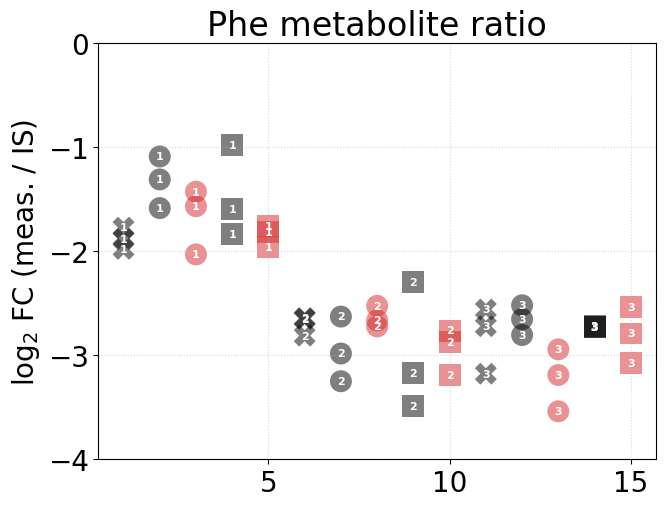

In [50]:
position = 0

for bio_rep in [1, 2, 3]:
    for time_point in [0, 4, 24]:
        for treatment in [0, 5]:
                
            rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == treatment)
            sampleIDs = list(metadata[rules].index.values)
            
            if len(sampleIDs) == 0:
                pass
            elif len(sampleIDs) != 3:
                print(len(sampleIDs))
                raise ValueError('not expected number of samples')
            if len(sampleIDs) == 3:
                values = metabolite_ratio[sampleIDs].values
                position = position + 1

                # plot
                if treatment == 0:
                    the_color = 'black'
                else:
                    the_color='tab:red'
                if time_point == 0:
                    the_marker = 'X'
                elif time_point == 4:
                    the_marker = 'o'
                elif time_point == 24:
                    the_marker = 's'
                else:
                    raise ValueError('unknown timepoint')
                
                matplotlib.pyplot.scatter([position, position, position], 
                                          values, s=250, edgecolors='none', marker=the_marker, color=the_color, alpha=1/2)
                for value in values:
                    matplotlib.pyplot.text(position, value, 
                                       bio_rep, fontsize=8, color='white', ha='center', va='center', weight='bold')
            
#
# close figure
#
matplotlib.pyplot.ylim(-4, 0)
matplotlib.pyplot.ylabel('log$_2$ FC (meas. / IS)')
#matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('Phe metabolite ratio')
matplotlib.pyplot.show()

In [64]:
for bio_rep in [1, 2, 3]:
    for time_point in [4, 24]:
        
        rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == 0) 
        sampleIDs = list(metadata[rules].index.values)
        reference_values = metabolite_ratio[sampleIDs].values

        rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == 5) 
        sampleIDs = list(metadata[rules].index.values)
        drug_values = metabolite_ratio[sampleIDs].values

        log2FC = numpy.mean(drug_values) - numpy.mean(reference_values)
        [statistic, pvalue] = scipy.stats.ttest_ind(drug_values, reference_values)
        
        #print(bio_rep, time_point)
        #print(reference_values, drug_values)
        #print(statistic, pvalue)
        if (pvalue < 0.05) & (numpy.abs(log2FC) > 1):
            print('FOUND!!!')

        
        #print()

In [60]:
statis

-0.49941910431204983

In [ ]:
rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == treatment)
list(metadata[rules]['Sample ID'].values)

In [ ]:
# order them from a biological perpective.
# do all tests, correct for multiple testing and then show the significant ones. three against three

